<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/TensorFlow_basic_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [6]:
w = tf.Variable(tf.random_normal([1])) # 
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b  # : model

In [7]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print('Step {} : w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
    w_out, b_out = sess.run([w, b])

Step 0 : w [0.95255095] b [0.48954073]
loss 322.525146484375

Step 1000 : w [0.3141045] b [13.497672]
loss 145.42706298828125

Step 2000 : w [-0.16844365] b [21.535156]
loss 79.364990234375

Step 3000 : w [-0.46679297] b [26.504562]
loss 54.11127853393555

Step 4000 : w [-0.6512591] b [29.577091]
loss 44.457305908203125

Step 5000 : w [-0.7653111] b [31.47678]
loss 40.76683044433594

Step 6000 : w [-0.8358292] b [32.651352]
loss 39.35602569580078

Step 7000 : w [-0.87942904] b [33.377563]
loss 38.816715240478516

Step 8000 : w [-0.90638554] b [33.826565]
loss 38.61055374145508

Step 9000 : w [-0.92305213] b [34.104168]
loss 38.531742095947266



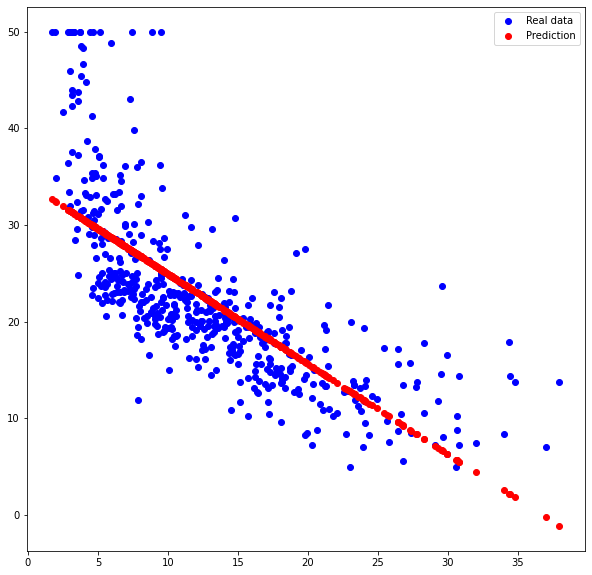

In [12]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label = 'Real data' )
plt.plot(x_data, x_data * w_out + b_out, 'ro', label = 'Prediction')
plt.legend()
plt.show()

In [24]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [30]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data,W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1,W2))
output = tf.matmul(hidden2, W_out)

In [31]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output)

Step 0 || Loss : 672.19970703125
Step 5000 || Loss : 26.69788932800293
Step 10000 || Loss : 26.131311416625977
Step 15000 || Loss : 26.083723068237305
Step 20000 || Loss : 26.066715240478516
Step 25000 || Loss : 26.053199768066406
Step 30000 || Loss : 26.048246383666992
Step 35000 || Loss : 26.04560089111328
Step 40000 || Loss : 26.044118881225586
Step 45000 || Loss : 26.04318618774414


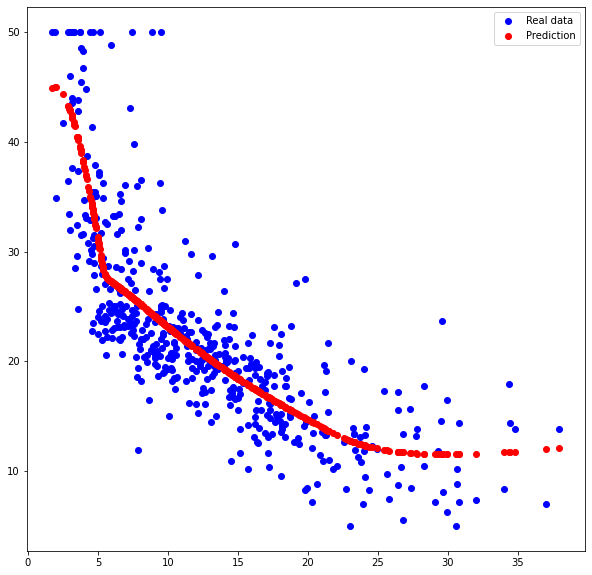

In [33]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label = 'Real data' )
plt.plot(x_data, output, 'ro', label = 'Prediction')
plt.legend()
plt.show()